## Coral Mapping Project

__Research question: to find out if there is a correlation between certain anthropogenic factors and the increase in coral bleaching__

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# for plotting
import matplotlib.pyplot as plt
import numpy as np

### Import coral bleaching file

In [2]:
coral = gpd.read_file('CoralBleaching.csv')
pd.options.display.max_columns = None
coral.head()

ID REGION SUBREGION COUNTRY               LOCATION     LAT    LON MONTH  \
0  7067                   France     Hermitage, Reunion  -21.22  55.22     4   
1  7068                   France  Saint Gilles, Reunion  -21.05  55.23     7   
2  7069                   France     Saint-Leu, Reunion  -21.16  55.28     2   
3  4024                   France              SE France      43      5     8   
4  7049                    Macau   Koh Tao, Surat Thani   10.12  99.81     7   

   YEAR DEPTH SEVERITY_CODE BLEACHING_SEVERITY CORAL_FAMILY  \
0  2008     6             0       No Bleaching                
1  2008   6.5             0       No Bleaching                
2  2008     6             0       No Bleaching                
3  1999                  -1   Severity Unknown                
4  2009     4             0       No Bleaching                

                                CORAL_SPECIES PERCENTAGE_AFFECTED  \
0                                                                   
1                                                                   
2                                                                   
3  Cladocora caespitosa, Oculina patagonensis                       
4                                                                   

  BLEACHING_DURATION MORTALITY_CODE MORTALITY RECOVERY_CODE RECOVERY  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

           SURVEY_TYPE SURVEY_AREA                       WATER_TEMPERATURE  \
0  Reef Check Protocol                                                       
1  Reef Check Protocol                                                       
2  Reef Check Protocol                                                       
3               Diving      100 km                              22-23.9 °C   
4  Reef Check Protocol              Air temp 28 Deg C, Water temp 29 Deg C   

  OTHER_FACTORS                                            REMARKS  \
0                0% of recorded Recently killed coral on substr...   
1                0% of recorded Recently killed coral on substr...   
2                0% of recorded Recently killed coral on substr...   
3                Bleaching of Cladocora caespitosa and Oculina ...   
4                0% of recorded recently killed coral on substr...   

                                              SOURCE REFERENCE_CODE  \
0  Reef Check, Submitted by Harold Cambert. Site ...                  
1  Reef Check, Submitted by Harold Cambert. Site ...                  
2  Reef Check, Submitted by Harold Cambert . Site...                  
3  Martin Pêcheux (martin-pecheux@wanadoo.fr) per...                  
4  Reef check submitted by Suchana Apple Chavanic...                  

  COUNTRY_CODE geometry  
0          FRA     None  
1          FRA     None  
2          FRA     None  
3          FRA     None  
4          MAC     None

In [3]:
list(coral)

['ID',
 'REGION',
 'SUBREGION',
 'COUNTRY',
 'LOCATION',
 'LAT',
 'LON',
 'MONTH',
 'YEAR',
 'DEPTH',
 'SEVERITY_CODE',
 'BLEACHING_SEVERITY',
 'CORAL_FAMILY',
 'CORAL_SPECIES',
 'PERCENTAGE_AFFECTED',
 'BLEACHING_DURATION',
 'MORTALITY_CODE',
 'MORTALITY',
 'RECOVERY_CODE',
 'RECOVERY',
 'SURVEY_TYPE',
 'SURVEY_AREA',
 'WATER_TEMPERATURE',
 'OTHER_FACTORS',
 'REMARKS',
 'SOURCE',
 'REFERENCE_CODE',
 'COUNTRY_CODE',
 'geometry']

In [4]:
coral = coral[['COUNTRY',
 'LOCATION',
 'LAT',
 'LON',
 'MONTH',
 'YEAR',
 'BLEACHING_SEVERITY',
 'WATER_TEMPERATURE',
 'COUNTRY_CODE',
 'geometry']]

### Convert `YEAR` and `MONTH` in `coral` to type datetime

In [6]:
coral['LAT'] = pd.to_numeric(coral['LAT'])
coral['LON'] = pd.to_numeric(coral['LON'])
coral['DAY'] = 1
coral['MONTH'] = coral['MONTH'].replace('','1')

In [7]:
coral['DATE'] = pd.to_datetime(coral[['YEAR', 'MONTH', 'DAY']])

Because there is no day recorded in the dataset, I chose all days as 1. 

### Further investigate and visualize `coral`

In [8]:
import plotly.express as px

In [9]:
bleaching_status = coral.BLEACHING_SEVERITY.value_counts().reset_index()
bleaching_status

index  BLEACHING_SEVERITY
0      No Bleaching                1477
1               Low                1429
2  Severity Unknown                1201
3              HIGH                1172
4            Medium                 911

### Create a bar chart to show the distribution of corals in each bleaching category

In [10]:
px.bar(bleaching_status,
       x='index',
       y='BLEACHING_SEVERITY',
       color='index',
       title='Global Coral Bleaching Status from 1963 to 2012',
       labels={'BLEACHING_SEVERITY':'count','index':'Bleaching Severity'},
       category_orders={"index": ['Severity Unknown','No Bleaching','Low', 'Medium', 'HIGH']}
      )

From the graph, it seems that there is an overwhelmingly large high-bleaching-status coral, not to mention that there might be more in the `Severity Unknown` category.

### Create map based on the distribution of different bleaching status

In [11]:
bleaching_list = coral.BLEACHING_SEVERITY.unique().tolist()
bleaching_list
bleaching_list = [ 'Severity Unknown','No Bleaching','Low','Medium','HIGH']

In [12]:
from ipywidgets import interact
@interact
def scatter_map(bleach=bleaching_list):
    
    fig = px.scatter_mapbox(coral[coral.BLEACHING_SEVERITY == bleach], 
                            lat="LAT", 
                            lon="LON", 
                            color="BLEACHING_SEVERITY",
                            zoom=0,
                            labels={'BLEACHING_SEVERITY':'Bleaching Severity'}
                           )

    fig.update_layout(mapbox_style="carto-darkmatter")

    fig.show()

interactive(children=(Dropdown(description='bleach', options=('Severity Unknown', 'No Bleaching', 'Low', 'Medi…

In [13]:
fig_2 = px.scatter_mapbox(coral, 
                            lat="LAT", 
                            lon="LON", 
                            color="BLEACHING_SEVERITY",
                            zoom=0,
                            labels={'BLEACHING_SEVERITY':'Bleaching Severity'}
                           )
fig_2.update_layout(mapbox_style="carto-darkmatter")
fig_2.show()

The two maps above are visually not very informative because the plots are scattered and there is not much pattern. However, if we look at the `HIGH` category in the first map, we can see where they are concentrated – mostly in the Caribbeans and the around Indian Ocean.

### Import files about anthropogenic factors that might influence coral bleaching

In [14]:
pop = gpd.read_file('worldpop.geojson')

In [15]:
columns_to_keep = [
 'COUNTRY',
 'iso3',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 'geometry']
pop = pop[columns_to_keep]

### Import files to be joined with `pop`

In [16]:
plastic = gpd.read_file('plastic.csv') #this dataset contains the total plastic waste generation in each country in 2010
Air = gpd.read_file("air.csv") #this file contains death rate of each country caused by air pollution from 1990 to 2017.
Forest = gpd.read_file('forest.csv') #this file contains forest cover of each country from 1990 to 2020.

In [17]:
plastic = plastic.drop(columns=['geometry', 'Entity'])
plastic.columns = ['iso3', 'total_tonnes']

In [18]:
air = Air[Air['Year'] == '2010']

In [19]:
air.columns = ['COUNTRY',
 'iso3',
 'Year',
 'AP_Death_Rate',
 'geometry']

In [20]:
air = air[['iso3',
 'AP_Death_Rate']]

In [21]:
air['AP_Death_Rate'] = pd.to_numeric(air.copy()['AP_Death_Rate'])

In [22]:
forest = Forest[Forest['Year'] == '2020']
forest = forest[['Code','Forest cover']]
forest.columns = ['iso3','cover']

In [23]:
forest = forest.dropna()

In [24]:
type(forest)

pandas.core.frame.DataFrame

In [25]:
forest['cover'] = pd.to_numeric(forest.copy()['cover'])

In [26]:
joined = pd.merge(pop,forest,on=['iso3'])

In [27]:
joined['cover'] = joined['cover'].fillna(0)

### Create a more advanced map that maps coral bleaching with forest covers in each country

In [28]:
from keplergl import KeplerGl
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

### Save configuration manually and apply it to the map

In [29]:
config = {'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['coral'],
     'id': 'a5idxw7ua',
     'name': ['BLEACHING_SEVERITY'],
     'type': 'multiSelect',
     'value': ['HIGH', 'Medium', 'Low', 'No Bleaching'],
     'enlarged': False,
     'plotType': 'histogram',
     'yAxis': None},
    {'dataId': ['coral'],
     'id': 'khl0sse4q',
     'name': ['DATE'],
     'type': 'timeRange',
     'value': [-220924800000, 1338508800000],
     'enlarged': True,
     'plotType': 'histogram',
     'yAxis': None}],
   'layers': [{'id': 'trajdp',
     'type': 'cluster',
     'config': {'dataId': 'coral',
      'label': 'Coral Bleaching',
      'color': [30, 150, 190],
      'columns': {'lat': 'LAT', 'lng': 'LON'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'clusterRadius': 40,
       'colorRange': {'name': 'Custom Palette',
        'type': 'custom',
        'category': 'Custom',
        'colors': ['#ce1256', '#d7b5d8', '#df65b0', '#f1eef6']},
       'radiusRange': [1, 40],
       'colorAggregation': 'mode'},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'BLEACHING_SEVERITY',
       'type': 'string'},
      'colorScale': 'ordinal'}},
    {'id': 'mzb5vm',
     'type': 'geojson',
     'config': {'dataId': 'Forest Cover',
      'label': 'Forest Cover',
      'color': [246, 209, 138],
      'columns': {'geojson': 'geometry'},
      'isVisible': True,
      'visConfig': {'opacity': 0.27,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [183, 136, 94],
       'colorRange': {'name': 'ColorBrewer Greens-6',
        'type': 'singlehue',
        'category': 'ColorBrewer',
        'colors': ['#edf8e9',
         '#c7e9c0',
         '#a1d99b',
         '#74c476',
         '#31a354',
         '#006d2c']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'stroked': False,
       'filled': True,
       'enable3d': False,
       'wireframe': False},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'cover', 'type': 'real'},
      'colorScale': 'quantize',
      'sizeField': None,
      'sizeScale': 'linear',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'heightField': None,
      'heightScale': 'linear',
      'radiusField': None,
      'radiusScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Forest Cover': [{'name': 'COUNTRY',
        'format': None},
       {'name': 'cover', 'format': None}],
      'coral': [{'name': 'COUNTRY', 'format': None},
       {'name': 'LOCATION', 'format': None},
       {'name': 'LAT', 'format': None},
       {'name': 'LON', 'format': None},
       {'name': 'MONTH', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': True},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': -15.869876165095315,
   'longitude': -13.281820496300504,
   'pitch': 0,
   'zoom': 0.6390883347455456,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

In [30]:
map.add_data(data=joined,name='Forest Cover')
coral_df = pd.DataFrame(data=coral)
map.add_data(data=coral_df,name='coral')
map.config = config

### Investigate relationship

Because of the concentration of high bleaching in the Indian Ocean, it would be useful to look at the change in forest covers in the countries nearby to see if there is a relation.

In [64]:
Australia = Forest[Forest['Entity']=='Australia']
Indonesia = Forest[Forest['Entity']=='Indonesia']
India = Forest[Forest['Entity']=='India']

In [63]:
fig = px.line(Australia, x="Year", y="Forest cover", title='Forest cover')
fig.show()

In [66]:
fig = px.line(Indonesia, x="Year", y="Forest cover", title='Forest cover')
fig.show()

Indonesia shows the highest decrease in forest cover and its surrounding corals also show a higher bleaching severity.

In [67]:
fig = px.line(India, x="Year", y="Forest cover", title='Forest cover')
fig.show()

In [31]:
combined = pd.merge(pop,plastic,on=['iso3'])
combined.sample()

COUNTRY iso3       1963       1964       1965       1966       1967  \
63  Angola  AGO  5679458.0  5735044.0  5770570.0  5781214.0  5774243.0   

         1968       1969       1970       1971       1972       1973  \
63  5771652.0  5803254.0  5890365.0  6040777.0  6248552.0  6496962.0   

         1974       1975       1976       1977       1978       1979  \
63  6761380.0  7024000.0  7279509.0  7533735.0  7790707.0  8058067.0   

         1980       1981       1982       1983       1984       1985  \
63  8341289.0  8640446.0  8952950.0  9278096.0  9614754.0  9961997.0   

          1986        1987        1988        1989        1990        1991  \
63  10320111.0  10689250.0  11068050.0  11454777.0  11848386.0  12248901.0   

          1992        1993        1994        1995        1996        1997  \
63  12657366.0  13075049.0  13503747.0  13945206.0  14400719.0  14871570.0   

          1998        1999        2000        2001        2002        2003  \
63  15359601.0  15866869.0  16395473.0  16945753.0  17519417.0  18121479.0   

          2004        2005        2006        2007        2008        2009  \
63  18758145.0  19433602.0  20149901.0  20905363.0  21695634.0  22514281.0   

          2010        2011        2012  \
63  23356246.0  24220661.0  25107931.0   

                                             geometry total_tonnes  
63  MULTIPOLYGON (((23.47611 -17.62584, 23.28916 -...       528843

In [32]:
combined['total_tonnes'] = pd.to_numeric(combined['total_tonnes'])
combined.at[152,'total_tonnes'] = int(combined['total_tonnes'][152]) + int(plastic['total_tonnes'][69]) + int(plastic['total_tonnes'][89])

In [33]:
combined = pd.merge(combined,air,on=['iso3'])

In [34]:
combined.sample()

COUNTRY iso3        1963        1964        1965        1966        1967  \
44  Morocco  MAR  13478423.0  13857649.0  14230163.0  14595350.0  14954031.0   

          1968        1969        1970        1971        1972        1973  \
44  15307273.0  15656843.0  16004731.0  16350881.0  16696891.0  17048518.0   

          1974        1975        1976        1977        1978        1979  \
44  17413144.0  17796164.0  18198844.0  18620093.0  19059770.0  19516942.0   

          1980        1981        1982        1983        1984        1985  \
44  19990012.0  20479715.0  20984009.0  21495086.0  22002643.0  22499110.0   

          1986        1987        1988        1989        1990        1991  \
44  22980335.0  23447252.0  23903592.0  24355619.0  24807462.0  25260404.0   

          1992        1993        1994        1995        1996        1997  \
44  25711406.0  26155203.0  26584478.0  26994250.0  27383473.0  27754571.0   

          1998        1999        2000        2001        2002        2003  \
44  28110443.0  28455509.0  28793679.0  29126330.0  29454768.0  29782884.0   

          2004        2005        2006        2007        2008        2009  \
44  30115214.0  30455561.0  30804683.0  31163673.0  31536811.0  31929087.0   

          2010        2011        2012  \
44  32343389.0  32781850.0  33241898.0   

                                             geometry  total_tonnes  \
44  POLYGON ((-4.42042 35.15125, -4.35792 35.14611...        863555   

    AP_Death_Rate  
44      72.999064

### More correlation

In [38]:
y1998 = coral[coral['YEAR']=='1998'].copy() #also choose 2010 data in this file to match with the rest of the dataset
h1998 = y1998[y1998['BLEACHING_SEVERITY']=='HIGH']
m1998 = y1998[y1998['BLEACHING_SEVERITY']=='Medium']
l1998 = y1998[y1998['BLEACHING_SEVERITY']=='Low']

In [39]:
la_h = h1998['LAT'].tolist() #latitude_high
lo_h = h1998['LON'].tolist()
la_m = m1998['LAT'].tolist()
lo_m = m1998['LON'].tolist()
la_l = h1998['LAT'].tolist()
lo_l = l1998['LON'].tolist()

In [41]:
geometry_h = [Point(xy) for xy in zip(lo_h,la_h)]
high_bleaching_1998 = gpd.GeoDataFrame(geometry = geometry_h)
geometry_m = [Point(xy) for xy in zip(lo_m,la_m)]
medium_bleaching_1998 = gpd.GeoDataFrame(geometry = geometry_m)
geometry_l = [Point(xy) for xy in zip(lo_l,la_l)]
low_bleaching_1998 = gpd.GeoDataFrame(geometry = geometry_l)

In [42]:
from shapely.geometry import Point 

In [35]:
# for plotting
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx

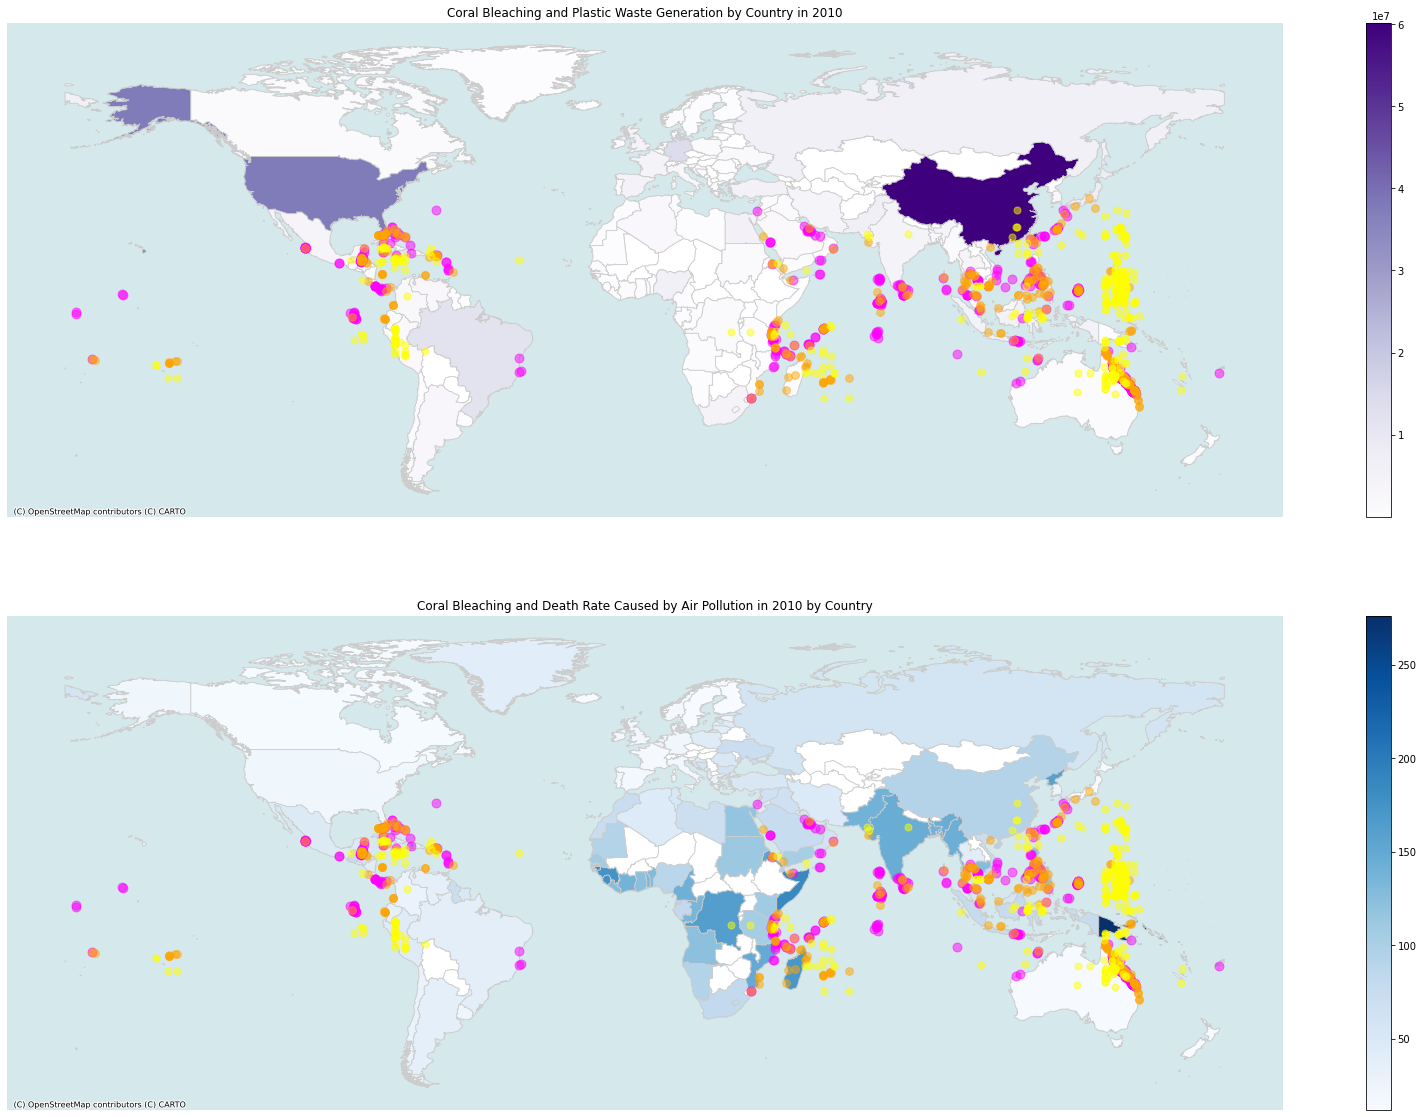

In [45]:
# use subplots to set up the canvas
combined = combined.to_crs('epsg:4326')
fig, axs = plt.subplots(2,1,figsize=(30,20))
ax1, ax2 = axs

#layer 1
pop.plot(ax=ax1,
         figsize=(30,20),
         color='white',
         linewidth=0.8,
         edgecolor='0.8')
#layer 2
combined.plot(ax=ax1,
            figsize=(30,20),
            cmap='Purples',
            column='total_tonnes',
            linewidth=0.8,
            edgecolor='0.8',
            legend= True)
#layer 3
high_bleaching_1998.plot(ax=ax1, 
           marker="o",
           markersize=80, 
           alpha=0.5, 
           c="fuchsia")
medium_bleaching_1998.plot(ax=ax1, 
           marker="o",
           markersize=60, 
           alpha=0.5, 
           c="orange")
low_bleaching_1998.plot(ax=ax1, 
           marker="o",
           markersize=50, 
           alpha=0.5, 
           c="yellow")


# add a title
ax1.set_title('Coral Bleaching and Plastic Waste Generation by Country in 2010')

# get rid of the axis
ax1.axis('off')
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Voyager)

#layer 1
pop.plot(ax=ax2,
         figsize=(30,20),
         color='white',
         linewidth=0.8,
         edgecolor='0.8')
#layer 2
combined.plot(ax=ax2,
            figsize=(30,20),
            cmap='Blues',
            column='AP_Death_Rate',
            linewidth=0.8,
            edgecolor='0.8',
            legend= True)
#layer 3
high_bleaching_1998.plot(ax=ax2, 
           marker="o",
           markersize=80, 
           alpha=0.5, 
           c="fuchsia")
medium_bleaching_1998.plot(ax=ax2, 
           marker="o",
           markersize=60, 
           alpha=0.5, 
           c="orange")
low_bleaching_1998.plot(ax=ax2, 
           marker="o",
           markersize=50, 
           alpha=0.5, 
           c="yellow")



# add a title
ax2.set_title('Coral Bleaching and Death Rate Caused by Air Pollution in 2010 by Country')

# get rid of the axis
ax2.axis('off')
ctx.add_basemap(ax2,source=ctx.providers.CartoDB.Voyager)

The above maps show how coral bleaching could be linked more to air pollution, as the countries with higher air pollution are closer to the bleaching corals.

This is my (Haiqi's) individual project, so I did all the work with some coding help from Yoh.